In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import sklearn

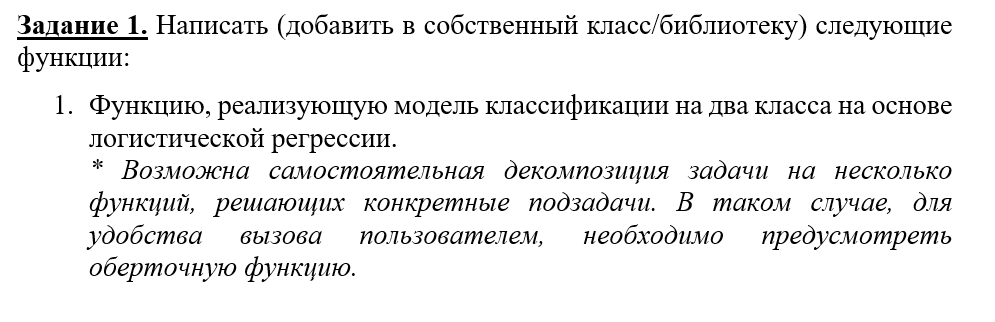

In [141]:
'''
Алгоритм рассчитан на работу одномерной модели классификации на основе логистической регресии при самостоятельном вводе данных.
Для того, чтобы вводить данные не вручную в алгоритме используется массив данных по умолчанию:
популярный массив данных для оценки классификации на основе данных о заболевании сахарным диабетом представлен 
в файле diabetes.csv
'''

q1 = int(input('Использоваь данные по умолчанию? 1 - да/0 - нет '))

if not q1:
    x_train = input('Введите значения х для обучающей выборки через пробел: ').split()
    x_test = input('Введите значения х для тестовой выборки через пробел: ').split()
    y_train = input('Введите значения y для тестовой выборки через пробел: ').split()
    y_test = input('Введите значения y для тестовой выборки через пробел: ').split()
    # преобразование текстовых данных в численные
    x_train = [float(i) for i in x_train]
    x_test = [float(i) for i in x_test]
    x_train = [float(i) for i in y_train]
    x_test = [float(i) for i in y_test]
    # библиотека sklearn работает на определенно виде данных, 
    # поэтому необходимо преобразовать их в массив np и изменить форму входных данных для верной работы алгоритма

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test)
    
else:
    df = pd.read_csv('diabetes.csv')
    Y = df['Outcome']
    X = df.drop(['Outcome'], axis=1)
    # разбиение данных на тестовые и обучающие выборки
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

q2 = int(input('Есть необязательные параметры? 1 - да/0 - нет '))   
# задаем необходимый параметр регуляризации
if q2:
    pen = input('Введите параметр регуляризации {l1, l2, elasticnet, none}: ')
    graph = int(input('Построить график? 1 - да/0 - нет '))
else:
    pen = 'none'
    graph = 0
    
    

Использоваь данные по умолчанию? 1 - да/0 - нет 1
Есть необязательные параметры? 1 - да/0 - нет 1
Введите параметр регуляризации {l1, l2, elasticnet, none}: l2
Построить график? 1 - да/0 - нет 1


In [125]:
# Функция для построения графика об эффективности классификации и кривой обучения

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # График кривая обучения
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # График результатов vs повторы
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # График повторов vs уровень доверия
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Предсказанные значения y: 
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]
Матрица смежности 
[[89 10]
 [24 31]]
Отчет о работе классификации 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

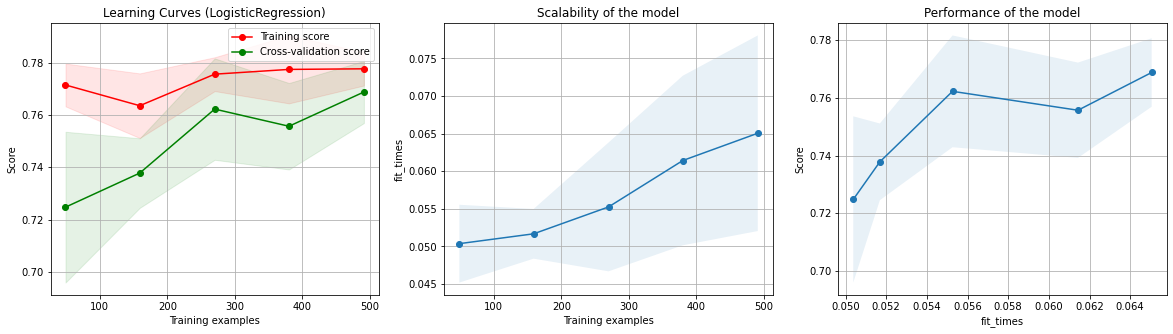

In [142]:
# Логистическая регрессия, параметр регуляризации
# Создание объекта классификации
# Пареметр max_iter используется для того, чтобы модель успела обучиться, иначе она будет недообучена 
# Параметр регуляризации по умолчанию none, имеется возможность задать его самостоятельно, 
# однако необходимо учитывать, что для разного вида регуляризации необходим соответствующий набор данных 
cls = LogisticRegression(max_iter = 10000, penalty = pen)


# Обучение модели
cls.fit(x_train, y_train)

# Построение предсказаний
y_pred = cls.predict(x_test)

#Вывод предсказанных значений
print('Предсказанные значения y: ') 
print(y_pred)

# Вывод матрицы смежности (дополнительно для анализа)
print('Матрица смежности ')
print(metrics.confusion_matrix(y_test, y_pred))

# Вывод отчета о работе классификации (дополнительно для анализа)
print('Отчет о работе классификации ')
print(classification_report(y_test, y_pred))

# Вывод графика
if graph:

    X = x_train
    y = y_train

    title = "Learning Curves (LogisticRegression)"
    estimator = LogisticRegression()
    plot_learning_curve(
        estimator, title, X, y
    )

Вывод: 
1) матрица: 89 результатов предсказано верно по 0, 31 - верно по 1, 10 - неверно по 0, 24 - неверно по 1; модель тяготеет к классу 0, при этом ошибок больше у класса 1 (примерно 32% против 27%)

2) точность сотавляет 78%, это означает, что на выборке из 100 значений 78 окажутся верными, а 22 неверными

3) Также точность (precision) показывает, что 76% по 1 можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными

4) Полнота показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм, в нашем случае это 56%

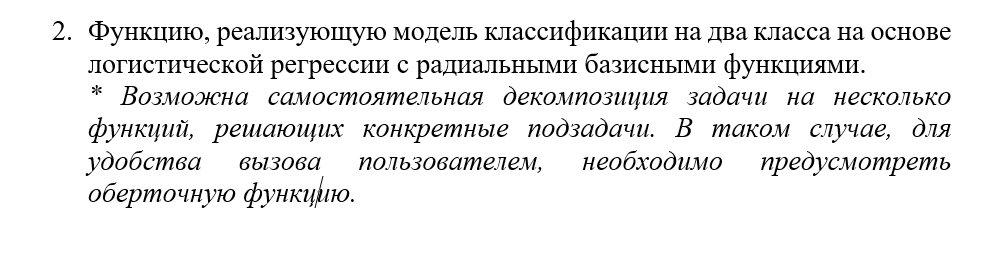

In [143]:
q1 = int(input('Использоваь данные по умолчанию? 1 - да/0 - нет '))

if not q1:
    x_train = input('Введите значения х для обучающей выборки через пробел: ').split()
    x_test = input('Введите значения х для тестовой выборки через пробел: ').split()
    y_train = input('Введите значения y для тестовой выборки через пробел: ').split()
    y_test = input('Введите значения y для тестовой выборки через пробел: ').split()
    # преобразование текстовых данных в численные
    x_train = [float(i) for i in x_train]
    x_test = [float(i) for i in x_test]
    x_train = [float(i) for i in y_train]
    x_test = [float(i) for i in y_test]
    # библиотека sklearn работает на определенно виде данных, 
    # поэтому необходимо преобразовать их в массив np и изменить форму входных данных для верной работы алгоритма

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test)
    
else:
    df = pd.read_csv('diabetes.csv')
    Y = df['Outcome']
    X = df.drop(['Outcome'], axis=1)
    # разбиение данных на тестовые и обучающие выборки
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

q2 = int(input('Есть необязательные параметры? 1 - да/0 - нет '))   
# Задаем регрессию с радиально базисными функциями
if q2:
    reg = input('Введите базисную функцию {newton-cg, lbfgs, liblinear, sag, saga}: ')
    graph = int(input('Построить график? 1 - да/0 - нет '))
else:
    reg = 'lbfgs'
    graph = 0
    
    

Использоваь данные по умолчанию? 1 - да/0 - нет 1
Есть необязательные параметры? 1 - да/0 - нет 1
Введите базисную функцию {newton-cg, lbfgs, liblinear, sag, saga}: sag
Построить график? 1 - да/0 - нет 1


Предсказанные значения y: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1]
Матрица смежности 
[[89 10]
 [40 15]]
Отчет о работе классификации 
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        99
           1       0.60      0.27      0.37        55

    accuracy                           0.68       154
   macro avg       0.64      0.59      0.58       154
weighted avg       0.66      0.68      0.64       154



C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

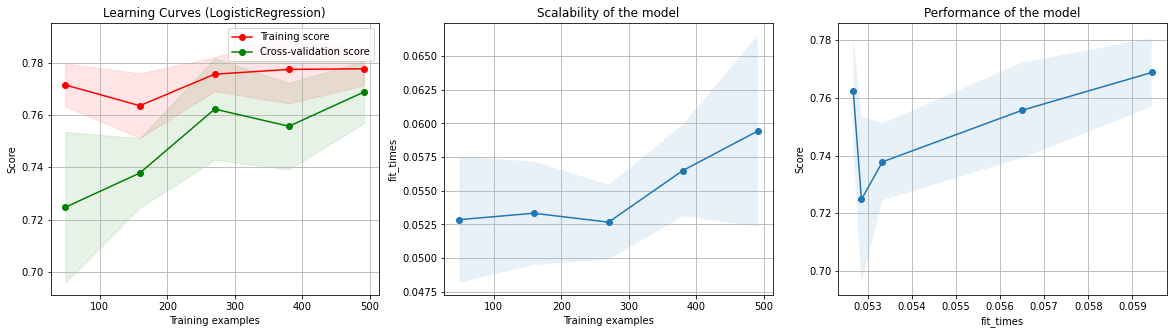

In [144]:
# Логистическая регрессия, радиальные базисные функции
# Задаем изменяющийся параметр радиальной базисной функции при учете следующих условий:
'''
Выбор алгоритма зависит от исследуемых данных и параметров регуляризации: 
newton-cg - ['l2', 'none']
lbfgs - ['l2', 'none']
liblinear - ['l1', 'l2']
sag - ['l2', 'none']
saga - ['elasticnet', 'l1', 'l2', 'none']

'''

# Создание объекта классификации
# Пареметр max_iter используется для того, чтобы модель успела обучиться, иначе она будет недообуче
cls = LogisticRegression(max_iter = 10000, solver = reg)


# Обучение модели
cls.fit(x_train, y_train)

# Построение предсказаний
y_pred = cls.predict(x_test)

#Вывод предсказанных значений
print('Предсказанные значения y: ') 
print(y_pred)

# Вывод матрицы смежности (дополнительно для анализа)
print('Матрица смежности ')
print(metrics.confusion_matrix(y_test, y_pred))

# Вывод отчета о работе классификации (дополнительно для анализа)
print('Отчет о работе классификации ')
print(classification_report(y_test, y_pred))

# Вывод графика
if graph:

    X = x_train
    y = y_train

    title = "Learning Curves (LogisticRegression)"
    estimator = LogisticRegression()
    plot_learning_curve(
        estimator, title, X, y
    )

Однозначно можно сделать вывод о том, что первая модель лучше, чем модель с заданной базисной функцией sag, даже не смотря на то, что наша модель показала хорошие результаты по классу 0, она не показала должного результата по классу 1, очевидно, что модель тяготеет к классу 0, что делает её недостаточно хорошей, что подтверждают показатели точности в 68% и показатель полноты в 27%

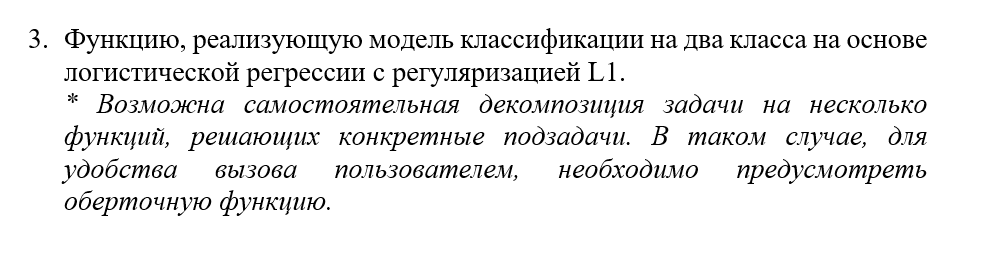

In [165]:
q1 = int(input('Использоваь данные по умолчанию? 1 - да/0 - нет '))

if not q1:
    x_train = input('Введите значения х для обучающей выборки через пробел: ').split()
    x_test = input('Введите значения х для тестовой выборки через пробел: ').split()
    y_train = input('Введите значения y для тестовой выборки через пробел: ').split()
    y_test = input('Введите значения y для тестовой выборки через пробел: ').split()
    # преобразование текстовых данных в численные
    x_train = [float(i) for i in x_train]
    x_test = [float(i) for i in x_test]
    x_train = [float(i) for i in y_train]
    x_test = [float(i) for i in y_test]
    # библиотека sklearn работает на определенно виде данных, 
    # поэтому необходимо преобразовать их в массив np и изменить форму входных данных для верной работы алгоритма

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test)
    
else:
    df = pd.read_csv('diabetes.csv')
    Y = df['Outcome']
    X = df.drop(['Outcome'], axis=1)
    # разбиение данных на тестовые и обучающие выборки
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

q2 = int(input('Есть необязательные параметры? 1 - да/0 - нет '))   
# Задаем регрессию с радиально базисными функциями
if q2:
    reg = input('Введите базисную функцию {liblinear, saga}: ')
    graph = int(input('Построить график? 1 - да/0 - нет '))
else:
    reg = 'liblinear'
    graph = 0
    
    

Использоваь данные по умолчанию? 1 - да/0 - нет 1
Есть необязательные параметры? 1 - да/0 - нет 1
Введите базисную функцию {liblinear, saga}: saga
Построить график? 1 - да/0 - нет 1


Предсказанные значения y: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1]
Матрица смежности 
[[89 10]
 [41 14]]
Отчет о работе классификации 
              precision    recall  f1-score   support

           0       0.68      0.90      0.78        99
           1       0.58      0.25      0.35        55

    accuracy                           0.67       154
   macro avg       0.63      0.58      0.57       154
weighted avg       0.65      0.67      0.63       154



C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

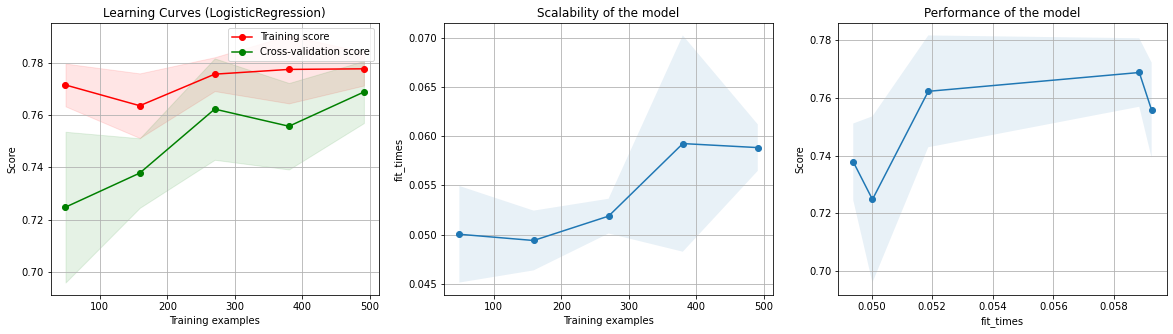

In [166]:
# Логистическая регрессия, параметр регуляризации L1
# Для регуляризации L1 базисными функциями могут являться лишь liblinear и saga, в работе алгоритма это предусмотрено 

# Создание объекта классификации
# Пареметр max_iter используется для того, чтобы модель успела обучиться, иначе она будет недообучена 
cls = LogisticRegression(max_iter = 10000, solver = reg, penalty = 'l1')


# Обучение модели
cls.fit(x_train, y_train)

# Построение предсказаний
y_pred = cls.predict(x_test)

#Вывод предсказанных значений
print('Предсказанные значения y: ') 
print(y_pred)

# Вывод матрицы смежности (дополнительно для анализа)
print('Матрица смежности ')
print(metrics.confusion_matrix(y_test, y_pred))

# Вывод отчета о работе классификации (дополнительно для анализа)
print('Отчет о работе классификации ')
print(classification_report(y_test, y_pred))

# Вывод графика
if graph:

    X = x_train
    y = y_train

    title = "Learning Curves (LogisticRegression)"
    estimator = LogisticRegression()
    plot_learning_curve(
        estimator, title, X, y
    )

Данный вид модели с параметром L1 и функцией saga также не демонстриует удовлетворительного результата, модель схожа по результатам со второй исследуемой моделью

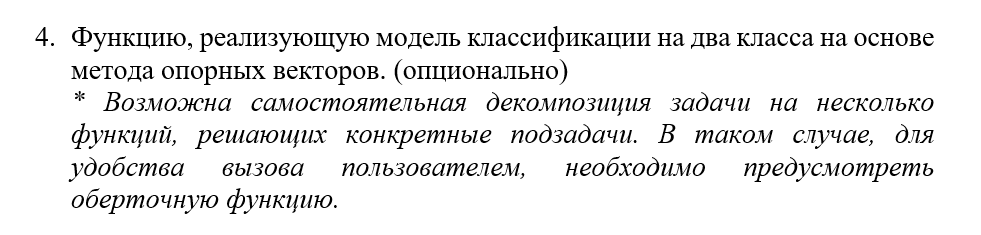

In [175]:
q1 = int(input('Использоваь данные по умолчанию? 1 - да/0 - нет '))

if not q1:
    x_train = input('Введите значения х для обучающей выборки через пробел: ').split()
    x_test = input('Введите значения х для тестовой выборки через пробел: ').split()
    y_train = input('Введите значения y для тестовой выборки через пробел: ').split()
    y_test = input('Введите значения y для тестовой выборки через пробел: ').split()
    # преобразование текстовых данных в численные
    x_train = [float(i) for i in x_train]
    x_test = [float(i) for i in x_test]
    x_train = [float(i) for i in y_train]
    x_test = [float(i) for i in y_test]
    # библиотека sklearn работает на определенно виде данных, 
    # поэтому необходимо преобразовать их в массив np и изменить форму входных данных для верной работы алгоритма

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test)
    
else:
    df = pd.read_csv('diabetes.csv')
    Y = df['Outcome']
    X = df.drop(['Outcome'], axis=1)
    # разбиение данных на тестовые и обучающие выборки
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

graph = int(input('Построить график? 1 - да/0 - нет '))

Использоваь данные по умолчанию? 1 - да/0 - нет 1
Построить график? 1 - да/0 - нет 1


Предсказанные значения y: 
[0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]
Матрица смежности 
[[93  6]
 [27 28]]
Отчет о работе классификации 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

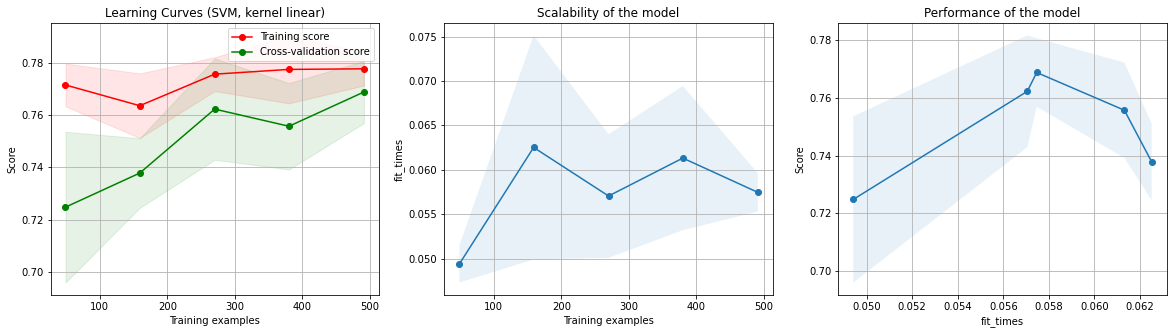

In [176]:
# Прямой метод опорных векторов

# Создание объекта классификации
clf = svm.SVC()

# Обучение модели
clf.fit(x_train, y_train)

# Построение предсказаний
y_pred = clf.predict(x_test)

#Вывод предсказанных значений
print('Предсказанные значения y: ') 
print(y_pred)

# Вывод матрицы смежности (дополнительно для анализа)
print('Матрица смежности ')
print(metrics.confusion_matrix(y_test, y_pred))

# Вывод отчета о работе классификации (дополнительно для анализа)
print('Отчет о работе классификации ')
print(classification_report(y_test, y_pred))

# Вывод графика
if graph:

    X = x_train
    y = y_train

    title = "Learning Curves (SVM, kernel linear)"
    estimator = LogisticRegression()
    plot_learning_curve(
        estimator, title, X, y
    )

Прямой метод опорных векторов показывает отличные показатели, которые лучше линейных моделей. Об этом говорит и матрица смежности и показатели точности, уровня доверия и полноты

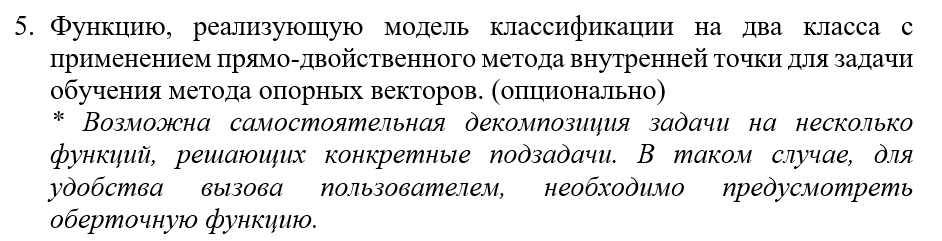

In [291]:
q1 = int(input('Использоваь данные по умолчанию? 1 - да/0 - нет '))

if not q1:
    x_train = input('Введите значения х для обучающей выборки через пробел: ').split()
    x_test = input('Введите значения х для тестовой выборки через пробел: ').split()
    y_train = input('Введите значения y для тестовой выборки через пробел: ').split()
    y_test = input('Введите значения y для тестовой выборки через пробел: ').split()
    # преобразование текстовых данных в численные
    x_train = [float(i) for i in x_train]
    x_test = [float(i) for i in x_test]
    x_train = [float(i) for i in y_train]
    x_test = [float(i) for i in y_test]
    # библиотека sklearn работает на определенно виде данных, 
    # поэтому необходимо преобразовать их в массив np и изменить форму входных данных для верной работы алгоритма

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test)
    
else:
    df = pd.read_csv('diabetes.csv')
    Y = df['Outcome']
    X = df.drop(['Outcome'], axis=1)
    # разбиение данных на тестовые и обучающие выборки
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

graph = int(input('Построить график? 1 - да/0 - нет '))

Использоваь данные по умолчанию? 1 - да/0 - нет 1
Построить график? 1 - да/0 - нет 1


Предсказанные значения y: 
[1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]
Матрица смежности 
[[92  7]
 [25 30]]
Отчет о работе классификации 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154



<IPython.core.display.Javascript object>


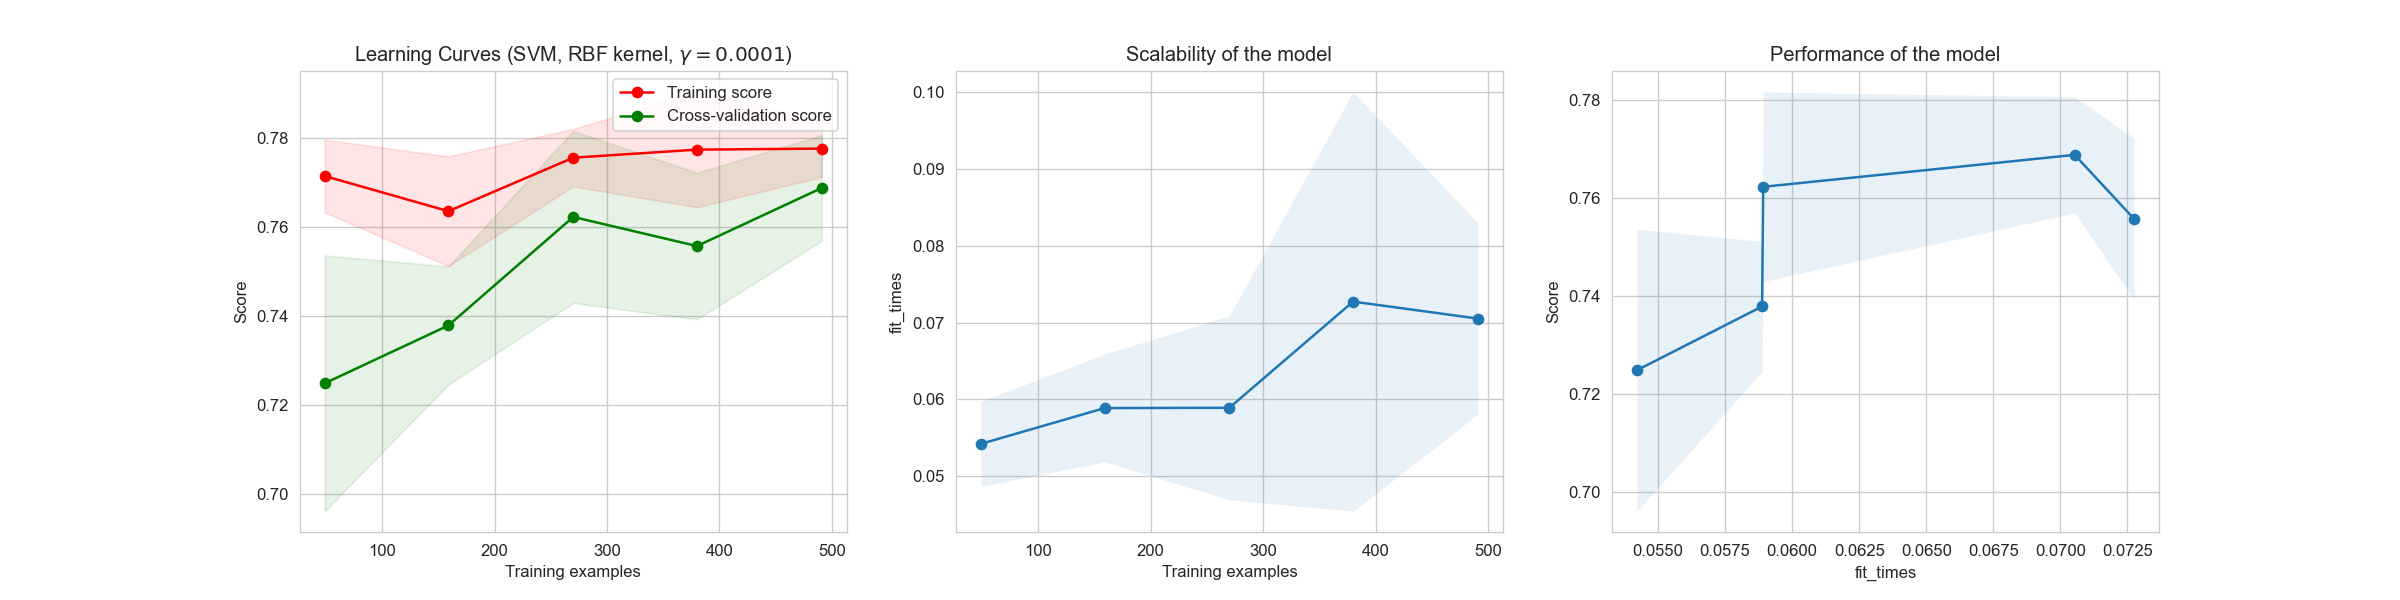

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\blued\anaconda3\lib\site-packages

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\blued\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\blued\anaconda3\lib\site-packages

In [292]:
# Прямой метод опорных векторов

# Создание объекта классификации
clf_svm_g = svm.SVC(kernel='rbf', gamma = 0.0001, C = 1)

# Обучение модели
clf_svm_g.fit(x_train, y_train)

# Построение предсказаний
y_pred = clf_svm_g.predict(x_test)

#Вывод предсказанных значений
print('Предсказанные значения y: ') 
print(y_pred)

# Вывод матрицы смежности (дополнительно для анализа)
print('Матрица смежности ')
print(metrics.confusion_matrix(y_test, y_pred))

# Вывод отчета о работе классификации (дополнительно для анализа)
print('Отчет о работе классификации ')
print(classification_report(y_test, y_pred))

# Вывод графика
if graph:

    X = x_train
    y = y_train

    title = "Learning Curves (SVM, RBF kernel, $\gamma=0.0001$)"
    estimator = LogisticRegression()
    plot_learning_curve(
        estimator, title, X, y
    )

Показатели методом опорных векторов c двойственным методом показывают результаты, которые явно лучше предыдущих моделей, такие как: 92 точных результатов по 0, 30 точных результат по 1, при этом достоверность равна 79%, точность 81%, а плотность 55%, к тому же доли неправильных предсказаний составляют 25 и 7 соответственно

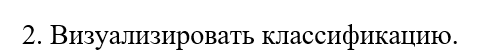

In [293]:
y_test = np.array(y_test)
x_test_1 = np.array(x_test['Age'])

<IPython.core.display.Javascript object>


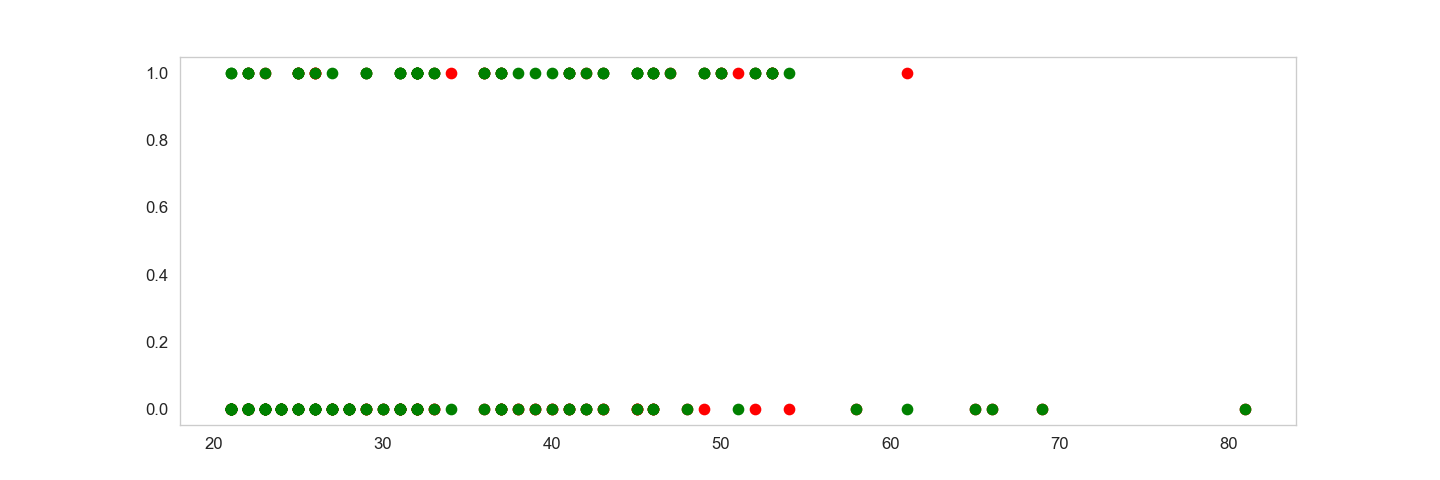

In [294]:
# Визуализация верных и неверных значений классификации

fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x_test_1,y_pred, color = 'red')
ax.scatter(x_test_1, y_test, color = 'green')
plt.show()

In [324]:
import plotly.express as px
import plotly.graph_objects as go

# Визуализация классификации по параметрам датасета
  

fig = go.Figure(data =[go.Scatter3d(x = x_test['SkinThickness'],
                                   y = x_test['Age'],
                                   z = x_test['BMI'],
                                   mode ='markers',
                                   marker = dict(
                                     size = 7,
                                     color = y_test,
                                     colorscale ='Viridis',
                                     opacity = 0.8))])


fig.show()